Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.50      0.09      0.16      1496

    accuracy                           0.85     10000
   macro avg       0.68      0.54      0.54     10000
weighted avg       0.81      0.85      0.80     10000

AUC: 0.7718032816265137


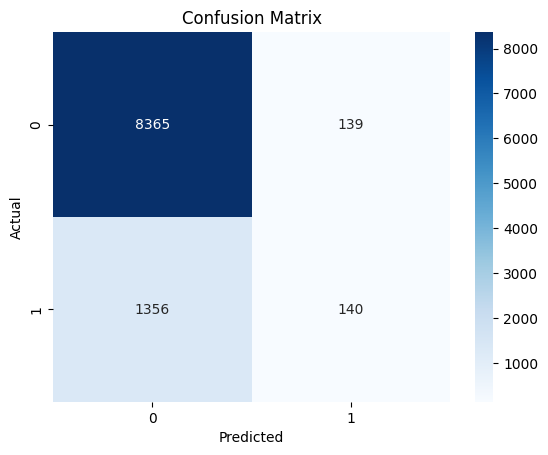

                    Feature  Importance
1             purchase_lead    0.137627
3               flight_hour    0.110581
2            length_of_stay    0.110268
4                flight_day    0.074021
810  booking_origin_Oceania    0.066215
..                      ...         ...
25             route_BBIMEL    0.000000
244            route_CXRMEL    0.000000
472            route_JEDMFM    0.000000
54             route_BKIMRU    0.000000
378            route_HKTJED    0.000000

[812 rows x 2 columns]


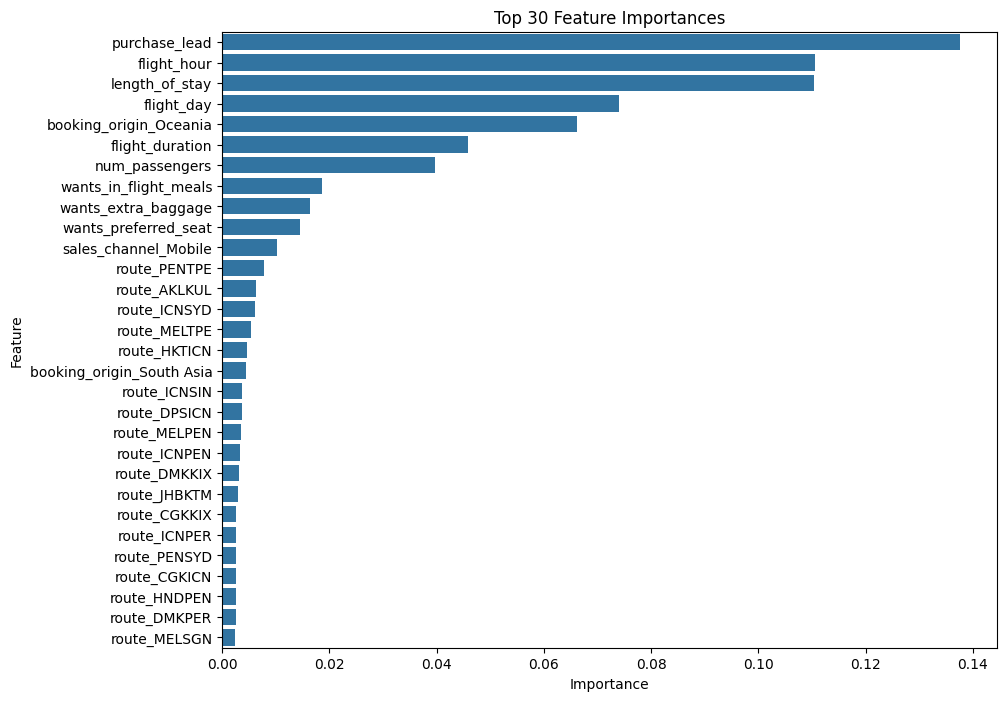

In [2]:
# 加载数据
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# 映射 flight_day
day_mapping = {"Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7}
df["flight_day"] = df["flight_day"].map(day_mapping)

# 合并高基数类别特征 (e.g., booking_origin)
region_mapping = {
    'Australia': 'Oceania', 'India': 'South Asia', 'China': 'East Asia', 
    'USA': 'North America', 'UK': 'Europe', 'UAE': 'Middle East',
    # 继续扩展其他国家和地区...
    'Unknown': 'Unknown'
}
df['booking_origin'] = df['booking_origin'].map(region_mapping)

# One-Hot Encoding 处理非数值数据
df_encoded = pd.get_dummies(df, columns=['route', 'sales_channel', 'trip_type', 'booking_origin'], drop_first=True)

# 特征和目标变量
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 构建随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 评估模型
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 输出分类报告和 AUC
print('Classification Report:\n', classification_report(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_proba))

# 混淆矩阵热力图
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 特征重要性可视化
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 打印特征重要性
print(feature_importances)

# 可视化重要性排名
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(30))  # 只显示前30个特征
plt.title('Top 30 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
